In [3]:
import pandas as pd


In [2]:
import numpy as np

In [20]:
labels_flat = df_data_2[['label']].values.ravel()

print('labels_flat({0})'.format(len(labels_flat)))
print ('labels_flat[{0}] => {1}'.format(IMAGE_TO_DISPLAY,labels_flat[IMAGE_TO_DISPLAY]))

KeyError: "['label'] not in index"

In [21]:
labels_count = np.unique(labels_flat).shape[0]

print('labels_count => {0}'.format(labels_count))

NameError: name 'labels_flat' is not defined

In [4]:
# The code was removed by Watson Studio for sharing.

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:

body = client_27ee580305434f1bbc4e2cb34173dea5.get_object(Bucket='datascience-donotdelete-pr-yxohijoy5rpywf',Key='train_.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_2 = pd.read_csv(body)
df_data_2.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [251]:
cat_columns = ["Sex", "Embarked"]
df_processed_tr = pd.get_dummies(df_data_2, prefix_sep="__",
                              columns=cat_columns)
cat_columns = ["Sex", "Embarked"]
df_processed_te = pd.get_dummies(df_data_1, prefix_sep="__",
                              columns=cat_columns)

In [252]:
df_processed_tr.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex__female,Sex__male,Embarked__C,Embarked__Q,Embarked__S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,0,0,1


Exception ignored in: <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x7fe238750cc0>>
Traceback (most recent call last):
  File "/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/xgboost/core.py", line 324, in __del__
    _check_call(_LIB.XGDMatrixFree(self.handle))
AttributeError: 'DMatrix' object has no attribute 'handle'
Exception ignored in: <bound method DMatrix.__del__ of <xgboost.core.DMatrix object at 0x7fe22bd8ba20>>
Traceback (most recent call last):
  File "/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/xgboost/core.py", line 324, in __del__
    _check_call(_LIB.XGDMatrixFree(self.handle))
AttributeError: 'DMatrix' object has no attribute 'handle'


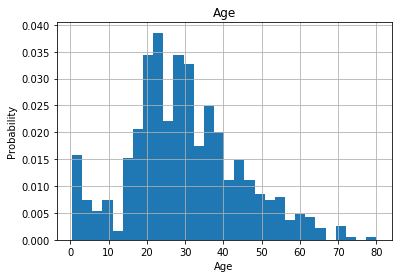

In [209]:

df_data_2.hist('Age', normed=True, bins=30)
plt.ylabel('Probability');
plt.xlabel("Age");

In [210]:
from sklearn.neural_network import MLPClassifier

In [211]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)

In [216]:
y = df_processed_tr["Survived"];
X = df_processed_tr.drop([ 'Survived','Name', 'Ticket', 'Cabin'], axis=1)
X_t = df_processed_te.drop(['Name', 'Ticket', 'Cabin'], axis=1)

In [219]:
import xgboost as xgb
gbm = xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05).fit(X,y)
predictions = gbm.predict(X_t )
#a.append(clf.score(X_test, y_test))

In [224]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(X_t, predictions)

ValueError: Classification metrics can't handle a mix of continuous-multioutput and binary targets

In [225]:
from sklearn.preprocessing import MinMaxScaler

In [237]:
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
scaler = MinMaxScaler()
scaler.fit(data)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [305]:
xx=["Fare","Age"]
xxx=df_processed_tr[xx];
xxx.dropna(axis=0,inplace=True);
scaler = MinMaxScaler()
scaler.fit(xxx)
zz=scaler.transform(xxx)
df= pd.DataFrame(zz)

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe2181bb668>]], dtype=object)

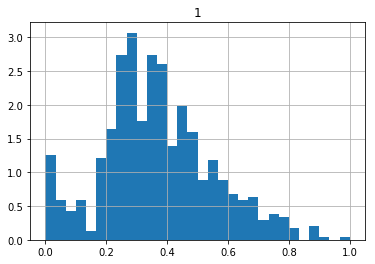

In [302]:
df.hist(1, normed=True, bins=30)

In [281]:
df.hist('Age', normed=True, bins=30)
plt.ylabel('Probability');
plt.xlabel("Age");

KeyError: "['Age'] not in index"

In [23]:
from sklearn.model_selection import train_test_split
train, validation = train_test_split(df_data_2, test_size=0.50, random_state = 5)

In [24]:
from sklearn.model_selection import LeaveOneOut
X = np.array([[1, 2], [3, 4]])
y = np.array([1, 2])
loo = LeaveOneOut()
loo.get_n_splits(X)

for train_index, test_index in loo.split(X):
        print("train:", train_index, "validation:", test_index)
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
 

train: [1] validation: [0]
train: [0] validation: [1]


In [26]:
from sklearn.model_selection import KFold 
kf = RepeatedKFold(n_splits, n_repeats=10, random_state=None) 
de RepeatedKFold(n_splits=5, n_repeats=10, random_state=None): 
for train_index, test_index in kf.split(X):
      print("Train:", train_index, "Validation:",test_index)
      X_train, X_test = X[train_index], X[test_index] 
      y_train, y_test = y[train_index], y[test_index]

SyntaxError: invalid syntax (<ipython-input-26-d2342b582d51>, line 3)

In [9]:

for train_index, test_index in loo.split(X):
   print("TRAIN:", train_index, "TEST:", test_index)
   X_train, X_test = X[train_index], X[test_index]
   y_train, y_test = y[train_index], y[test_index]
   print(X_train, X_test, y_train, y_test)

TRAIN: [1] TEST: [0]
[[3 4]] [[1 2]] [2] [1]
TRAIN: [0] TEST: [1]
[[1 2]] [[3 4]] [1] [2]


In [10]:
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [22]:
# Perform 6-fold cross validation
scores = cross_val_score(model, df, y, cv=6)
print ( scores)

NameError: name 'model' is not defined

In [7]:
cat_columns = ["Sex", "Embarked",'Pclass']
df_t = pd.get_dummies(df_data_1, prefix_sep="__",
                              columns=cat_columns)
# y_test = df_t["Survived"]
df_t=df_t.drop(['Name','Ticket','Cabin'], axis=1)
df_t.dropna(inplace=True)

In [15]:
cat_columns = ["Sex", "Embarked",'Pclass']
df = pd.get_dummies(df_data_2, prefix_sep="__",
                              columns=cat_columns)

df=df.drop(['Name','Ticket',"Cabin"], axis=1)
df.dropna(inplace=True)
y = df["Survived"];
df=df.drop(['Survived'], axis=1)
df.head()

,PassengerId,Age,SibSp,Parch,Fare,Sex__female,Sex__male,Embarked__C,Embarked__Q,Embarked__S,Pclass__1,Pclass__2,Pclass__3
0,1,22.0,1,0,7.2500,0,1,0,0,1,0,0,1
1,2,38.0,1,0,71.2833,1,0,1,0,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1,0,0,1
3,4,35.0,1,0,53.1000,1,0,0,0,1,1,0,0
4,5,35.0,0,0,8.0500,0,1,0,0,1,0,0,1


In [45]:
from sklearn.preprocessing import MinMaxScaler
scaled_df= df.copy()
col_names = ['Age', 'Fare']
features = scaled_features[col_names]
scaler = MinMaxScaler().fit(features.values)
features = scaler.transform(features.values)
scaled_df[col_names] = features
#scaled_features.head()
X=scaled_df;
scaled_df_t= df_t.copy()
col_names_= ['Age', 'Fare']
features_t = scaled_df_t[col_names_]
scaler_ = MinMaxScaler().fit(features_t.values)
features_ = scaler_.transform(features_t.values)

scaled_df_t[col_names] = features_
X_test=scaled_df_t;
# scaler = MinMaxScaler()
# scaled_df = scaler.fit_transform(df)
# X = pd.DataFrame(scaled_df)#columns=['Age', 'x2', 'x3'])
# scaler_t = MinMaxScaler()
# scaled_dft = scaler.fit_transform(df_t)
# scaled_dft = pd.DataFrame(scaled_dft)#columns=['Age', 'x2', 'x3'])
# X_test = scaled_dft;

In [47]:
X.head()

,PassengerId,Age,SibSp,Parch,Fare,Sex__female,Sex__male,Embarked__C,Embarked__Q,Embarked__S,Pclass__1,Pclass__2,Pclass__3
0,1,0.271174,1,0,0.014151,0,1,0,0,1,0,0,1
1,2,0.472229,1,0,0.139136,1,0,1,0,0,1,0,0
2,3,0.321438,0,0,0.015469,1,0,0,0,1,0,0,1
3,4,0.434531,1,0,0.103644,1,0,0,0,1,1,0,0
4,5,0.434531,0,0,0.015713,0,1,0,0,1,0,0,1


In [46]:
X_test.head()

,PassengerId,Age,SibSp,Parch,Fare,Sex__female,Sex__male,Embarked__C,Embarked__Q,Embarked__S,Pclass__1,Pclass__2,Pclass__3
0,892,0.452723,0,0,0.015282,0,1,0,1,0,0,0,1
1,893,0.617566,1,0,0.013663,1,0,0,0,1,0,0,1
2,894,0.815377,0,0,0.018909,0,1,0,1,0,0,1,0
3,895,0.353818,0,0,0.016908,0,1,0,0,1,0,0,1
4,896,0.287881,1,1,0.023984,1,0,0,0,1,0,0,1


In [48]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1000)
model.fit(X, y)
model.score(X, y)
#Predict Output
predicted= model.predict(X_test)

In [ ]:
predicted

In [13]:
pdtest = pd.DataFrame({'PassengerId': test.PassengerId.astype(int),
                            'Survived': predictions.astype(int)})
pdtest.to_csv('gptest.csv', index=False)

SyntaxError: invalid syntax (<ipython-input-13-a3d4cfd84f1a>, line 1)